## Stochastic gradient descent of Linear regression with L2 regularization
The required imports

In [2]:
import numpy as np
import pandas as pd
import random
random.seed(7)

readData() function reads a csv file containing the data. Data is stored in a directory named "data"

In [3]:
def readData():
    # reads input file and returns a dataframe
    data = pd.read_csv("data/data.csv",header=None)
    return data

Gradient Step denotes a step in gradient descent where the weights are updated upon calculation of gradient on each training sample.

In [4]:
def gradient_step(m_old, b_old, lambda_, learning_rate, data):
    y = data[1].tolist()
    x = data[0].tolist()
    N = len(x)
    for i in range(0, len(x)):
        m_old -= learning_rate*((-2/N)*(y[i] - m_old*x[i] - b_old)*x[i] + 2*lambda_*m_old)
        b_old -= learning_rate*((-2/N)*(y[i] - m_old*x[i] - b_old))
    return (m_old, b_old)

Stochastic gradient descent algorithm

In [5]:
def stochastic_gradient_descent(data, lambda_, learning_rate, iterations=100):
    m = 0
    b = 0
    for i in range(iterations):
        m, b = gradient_step(m, b, lambda_, learning_rate, data)
    return (m, b)

Function to compute the cost

In [6]:
def compute_cost(data, m, b, lambda_):
    x = data[0]
    y = data[1]
    N = float(len(x))
    t1 = (y-m*x-b)**2
    s1 = np.sum(t1)
    cost = s1/N + lambda_*(m**2)
    return cost

## Results
Running stochastic gradient descent for the equation:
```
L(x, y) = MeanSquraedError + lambda_*(m^2)
```
lambda_ value is set to 0.001

In [11]:
data = readData()
# Randomly shuffle data
data1 = data.sample(frac=1, random_state=1)

iterations = 1000
learning_rate = 0.0001
lambda_ = 0.001

In [12]:
m, b = stochastic_gradient_descent(data1, lambda_, learning_rate, iterations)
final_error = compute_cost(data1, m, b, lambda_)
print('After {} iterations, value of m={}, value of b={} and value of lambda={}. Final cost value = {}'.format(iterations, m, b, lambda_, final_error))

After 1000 iterations, value of m=1.4737051866925361, value of b=0.08882955364039179 and value of lambda=0.001. Final cost value = 112.6576749936473


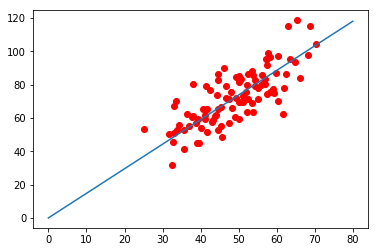

In [15]:

import matplotlib.pyplot as plt
plt.plot(data1[0], data1[1], 'ro')
x = np.linspace(0, 80, 120)
y = m*x + b
plt.plot(x,y)

In [74]:
import unittest

class TestSGD(unittest.TestCase):
    def test_compute_cost(self):
        df = pd.DataFrame({0: [10, 20], 1: [10, 20]})
        m = 1
        b = 1
        l = 1
        expected = 2
        obtained = compute_cost(df, m, b, l)
        self.assertEqual(expected, obtained)
    
    def test_stochastic_gradient_descent(self):
        x = range(0,200)
        y = [i*4 for i in x]
        data = pd.DataFrame({0: x, 1: y})
        m, b = stochastic_gradient_descent(data, 0, 0.00001, 1000)
        expected_m = 4
        expected_b = 0
        np.testing.assert_almost_equal(m, expected_m, decimal=3)
        np.testing.assert_almost_equal(b, expected_b, decimal=1)

unittest.main(argv=[''], verbosity=2, exit=False)

test_compute_cost (__main__.TestSGD) ... ok
test_stochastic_gradient_descent (__main__.TestSGD) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.274s

OK
